In [141]:
#import libraries
import pandas as pd
import mpl_style
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [142]:
plt.style.use(mpl_style.style1)

In [71]:
#read data  
df = pd.read_csv('./exo.csv', index_col=False, skiprows=144)

In [72]:
df.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


In [74]:
df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,8965.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,...,-0.045420,0.446229,1.866561,0.489930,-0.024244,0.425337,-0.076749,0.436684,1.812566,0.476060
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,...,2.573558,0.569933,2.988742,0.646403,2.382286,0.602150,2.553758,0.567535,2.986376,0.647587
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-75.900000,0.067000,0.000000,0.067000,-27.800000,0.067000,-76.600000,0.067000,0.000000,0.067000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-0.387000,0.098000,0.170000,0.100000,-0.310000,0.087000,-0.390000,0.090000,0.210000,0.094000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,0.000000,0.280000,0.610000,0.310000,-0.004000,0.250000,-0.017000,0.270000,0.583000,0.290000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,0.300000,0.610000,2.160000,0.680000,0.290000,0.590000,0.300000,0.600000,1.970000,0.660000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,27.500000,22.000000,88.600000,32.000000,46.570000,33.000000,34.000000,22.000000,89.600000,32.000000


In [75]:

df.rename(columns={'kepid': 'KepID',
                    'kepoi_name': 'KOI Name',
                    'kepler_name': 'Kepler Name',
                    'koi_disposition': 'Exoplanet Archive Disposition',
                    'koi_vet_stat': 'Vetting Status',
                    'koi_vet_date': 'Date of Last Parameter Update',
                    'koi_pdisposition': 'Disposition Using Kepler Data',
                    'koi_score': 'Disposition Score',
                    'koi_fpflag_nt': 'Not Transit-Like False Positive Flag',
                    'koi_fpflag_ss': 'Stellar Eclipse False Positive Flag',
                    'koi_fpflag_co': 'Centroid Offset False Positive Flag',
                    'koi_fpflag_ec': 'Ephemeris Match Indicates Contamination False Positive Flag',
                    'koi_period': 'Orbital Period (days)',
                    'koi_period_err1': 'Orbital Period (days) Upper Unc.',
                    'koi_period_err2': 'Orbital Period (days) Lower Unc.',
                    'koi_period': 'Orbital Period (days)',
                    'koi_time0bk': 'Transit Epoch (BJD - 2,454,833 days)',
                    'koi_time0bk_err1': 'Transit Epoch (BJD - 2,454,833 days) Upper Unc.',
                    'koi_time0bk_err2': 'Transit Epoch (BJD - 2,454,833 days) Lower Unc.',
                    'koi_impact': 'Impact Parameter',
                    'koi_impact_err1': 'Impact Parameter Upper Unc.',
                    'koi_time0': 'Time of Transit Center (BJD - 2,454,833 days)',
                    'koi_time0_err1': 'Time of Transit Center (BJD - 2,454,833 days) Upper Unc.',
                    'koi_time0_err2': 'Time of Transit Center (BJD - 2,454,833 days) Lower Unc.',
                    'koi_eccen': 'Eccentricity',
                    'koi_eccen_err1': 'Eccentricity Upper Unc.',
                    'koi_eccen_err2': 'Eccentricity Lower Unc.',
                    'koi_longp': 'Longitude of Periastron',
                    'koi_longp_err1': 'Longitude of Periastron Upper Unc.',
                    'koi_longp_err2': 'Longitude of Periastron Lower Unc.',
                    'koi_longp': 'Longitude of Periastron',
                    'koi_longp_err1': 'Longitude of Periastron Upper Unc.',
                    'koi_longp_err2': 'Longitude of Periastron Lower Unc.',
                    'koi_duration':'TransitDuration[hrs]',
                    'koi_duration_err1':'TransitDurationUpperUnc.[hrs]',
                    'koi_duration_err2':'TransitDurationLowerUnc.[hrs]',
                    'koi_depth':'TransitDepth[ppm]',
                    'koi_depth_err1':'TransitDepthUpperUnc.[ppm]',
                    'koi_depth_err2':'TransitDepthLowerUnc.[ppm]',
                    'koi_prad':'PlanetaryRadius[Earth radii]',
                    'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earth radii]',
                    'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earth radii]',
                    'koi_teq':'EquilibriumTemperature[K]',
                    'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K]',
                    'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K]',
                    'koi_insol':'InsolationFlux[Earthflux]',
                    'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux]',
                    'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux]',
                    'koi_model_snr':'TransitSignal-to-Nois',
                    'koi_tce_plnt_num':'TCEPlanetNumbe',
                    'koi_tce_delivname':'TCEDeliver',
                    'koi_steff':'StellarEffectiveTemperature[K]',
                    'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K]',
                    'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K]',
                    'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)]',
                    'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)]',
                    'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)]',
                    'koi_srad':'StellarRadius[Solar radii]',
                    'koi_srad_err1':'StellarRadiusUpperUnc.[Solar radii]',
                    'koi_srad_err2':'StellarRadiusLowerUnc.[Solar radii]',
                    'ra':'RA [decimal degrees]',
                    'dec':'Dec [decimal degrees]',
                    'koi_kepmag':'Kepler-band[mag]'
                    }, inplace=True)


In [76]:
for col in df.columns:
    print(col)

rowid
KepID
KOI Name
Kepler Name
Exoplanet Archive Disposition
Vetting Status
Date of Last Parameter Update
Disposition Using Kepler Data
Disposition Score
Not Transit-Like False Positive Flag
Stellar Eclipse False Positive Flag
Centroid Offset False Positive Flag
Ephemeris Match Indicates Contamination False Positive Flag
koi_disp_prov
koi_comment
Orbital Period (days)
Orbital Period (days) Upper Unc.
Orbital Period (days) Lower Unc.
Transit Epoch (BJD - 2,454,833 days)
Transit Epoch (BJD - 2,454,833 days) Upper Unc.
Transit Epoch (BJD - 2,454,833 days) Lower Unc.
Time of Transit Center (BJD - 2,454,833 days)
Time of Transit Center (BJD - 2,454,833 days) Upper Unc.
Time of Transit Center (BJD - 2,454,833 days) Lower Unc.
Eccentricity
Eccentricity Upper Unc.
Eccentricity Lower Unc.
Longitude of Periastron
Longitude of Periastron Upper Unc.
Longitude of Periastron Lower Unc.
Impact Parameter
Impact Parameter Upper Unc.
koi_impact_err2
TransitDuration[hrs]
TransitDurationUpperUnc.[hrs]
T

In [77]:
df['ExoPlanetCandidate'] = df['Disposition Using Kepler Data'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoPlanetCandidate'] = df['Exoplanet Archive Disposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [78]:
df.head()

,rowid,KepID,KOI Name,Kepler Name,Exoplanet Archive Disposition,Vetting Status,Date of Last Parameter Update,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200,2


In [79]:
df.isna().any()

rowid                            False
KepID                            False
KOI Name                         False
Kepler Name                       True
Exoplanet Archive Disposition    False
                                 ...  
koi_dikco_mdec                    True
koi_dikco_mdec_err                True
koi_dikco_msky                    True
koi_dikco_msky_err                True
ExoPlanetCandidate               False
Length: 142, dtype: bool

In [80]:
#deal with missing values
# df.dropna(inplace=True)

In [81]:
df.describe()

,rowid,KepID,Disposition Score,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephemeris Match Indicates Contamination False Positive Flag,Orbital Period (days),Orbital Period (days) Upper Unc.,Orbital Period (days) Lower Unc.,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,ExoPlanetCandidate
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,9564.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,...,0.446229,1.866561,0.489930,-0.024244,0.425337,-0.076749,0.436684,1.812566,0.476060,0.780636
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,...,0.569933,2.988742,0.646403,2.382286,0.602150,2.553758,0.567535,2.986376,0.647587,0.862851
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,0.067000,0.000000,0.067000,-27.800000,0.067000,-76.600000,0.067000,0.000000,0.067000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,0.098000,0.170000,0.100000,-0.310000,0.087000,-0.390000,0.090000,0.210000,0.094000,0.000000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,0.280000,0.610000,0.310000,-0.004000,0.250000,-0.017000,0.270000,0.583000,0.290000,0.000000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,0.610000,2.160000,0.680000,0.290000,0.590000,0.300000,0.600000,1.970000,0.660000,2.000000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,22.000000,88.600000,32.000000,46.570000,33.000000,34.000000,22.000000,89.600000,32.000000,2.000000


In [82]:
# def clean_data(df):
#     assert isinstance(df, pd.DataFrame), "you must pass a DataFrame object"

#     df.dropna(inplace=True)

#     keep_index = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[keep_index].astype(np.float64)

# clean_data(df)

In [122]:
# p = sns.countplot(x='StellarRadius[Solar radii]', data=df, palette='muted')
# _ = plt.setp(p.get_xticklabels(), rotation=90)

# p = sns.countplot(x='StellarEffectiveTemperature[K]', data=df, hue='ExoPlanetCandidate', palette='muted')

In [128]:
print('minimum right ascension: ' + str(df['RA [decimal degrees]'].min()))
print('maximum right ascension: ' + str(df['RA [decimal degrees]'].max()))


minimum right ascension: 279.85272
maximum right ascension: 301.72076


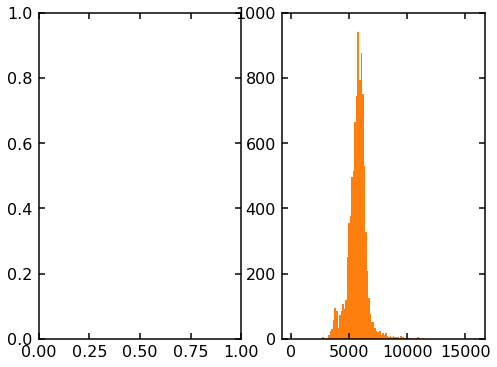

In [143]:
fig, ax = plt.subplots(1, 2)
ax[0] = plt.hist(df['StellarRadius[Solar radii]'], bins=100)
ax[1] = plt.hist(df['StellarEffectiveTemperature[K]'], bins=100)



# plt.hist(df['StellarRadius[Solar radii]'], bins=1000, alpha=0.5)
# plt.hist(df['StellarEffectiveTemperature[K]'], bins=1000, alpha=0.5)
plt.ylim(0, 1000)

plt.show()

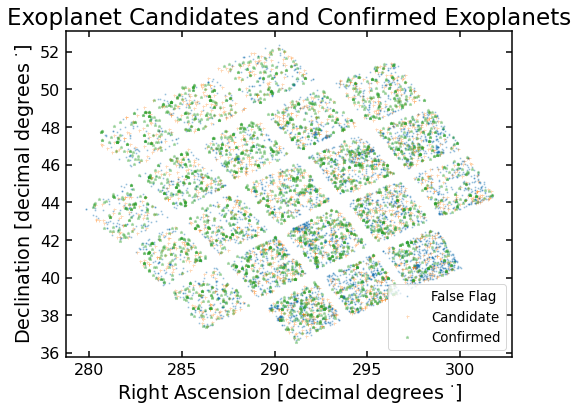

In [158]:
plt.figsize=(40, 40)
#plt.plot(df['RA [decimal degrees]'], df['Dec [decimal degrees]'], 'o', markersize=0.5, alpha=0.3)
#plot right ascension and declination for data points that are either confirmed or candidates
plt.plot(df[df['ExoPlanetCandidate'] == 0]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 0]['Dec [decimal degrees]'], 'o', markersize=1, alpha=0.3)
plt.plot(df[df['ExoPlanetCandidate'] == 1]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 1]['Dec [decimal degrees]'], '+', markersize=3, alpha=0.3)
plt.plot(df[df['ExoPlanetCandidate'] == 2]['RA [decimal degrees]'], df[df['ExoPlanetCandidate'] == 2]['Dec [decimal degrees]'], '*', markersize=3, alpha=0.3)
plt.xlabel('Right Ascension [decimal degrees $^{\cdot}$]')
plt.ylabel('Declination [decimal degrees $^{\cdot}$]')
plt.title('Exoplanet Candidates and Confirmed Exoplanets')
plt.legend(['False Flag', 'Candidate', 'Confirmed'], loc='lower right', fontsize='smaller')

In [161]:
#plot a correlation matrix of the kepler data
# corr = df.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()